In [1]:
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.optimizers import Adam
import matplotlib.pyplot as plt



In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 61s 0us/step


Normalize 

In [3]:
x_train = x_train.astype('float32')/255.0
x_test  = x_test.astype('float32')/255.0


to_categorical

In [4]:
print(f"before : label is :{y_train[0]}")
y_train = to_categorical(y_train)
print(f"after : label is :{y_train[0]}")
print(f"after : label is :{y_train[100]}")
y_test = to_categorical(y_test)

before : label is :[6]
after : label is :[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
after : label is :[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


Architecture

In [5]:
model = Sequential()
model.add(Flatten(input_shape =(32,32,3)))
model.add(Dense(128,'relu'))  #layer containg 128 neuron 
model.add(Dense(10,'softmax'))       #10 neurons last layer

c:\Users\sonuj\Downloads\Day2\env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
#compile
model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
#Train
result=model.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2) #64 images are sent each time

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1365 - loss: 2.6978 - val_accuracy: 0.1677 - val_loss: 2.1259
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1737 - loss: 2.0792 - val_accuracy: 0.1730 - val_loss: 2.0755
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1828 - loss: 2.0596 - val_accuracy: 0.1875 - val_loss: 2.0530
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1789 - loss: 2.0610 - val_accuracy: 0.1855 - val_loss: 2.0501
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1801 - loss: 2.0627 - val_accuracy: 0.1676 - val_loss: 2.0539
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1832 - loss: 2.0547 - val_accuracy: 0.1744 - val_loss: 2.0542
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1827 - loss: 2.0607 - val_accuracy: 0.1864 - val_loss: 2.0918
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1768 - loss: 2.0598 - val_accuracy: 0.

In [8]:
#Evaluate
loss,accuracy = model.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")
print(result.history.keys())
print(result.history.values())
print(result.history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1873 - loss: 2.0593
test loss:2.05926513671875
test accuracy:0.18729999661445618
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
dict_values([[0.13654999434947968, 0.17372499406337738, 0.18275000154972076, 0.1789499968290329, 0.180075004696846, 0.1831749975681305, 0.18267500400543213, 0.17682500183582306, 0.18337500095367432, 0.1799750030040741], [2.697765350341797, 2.0791776180267334, 2.059610366821289, 2.061004638671875, 2.0626556873321533, 2.0546622276306152, 2.06069016456604, 2.0598371028900146, 2.0580146312713623, 2.0622754096984863], [0.16769999265670776, 0.17299999296665192, 0.1875, 0.18549999594688416, 0.16760000586509705, 0.17440000176429749, 0.18639999628067017, 0.1745000034570694, 0.1784999966621399, 0.1826000064611435], [2.125929594039917, 2.075547695159912, 2.0530407428741455, 2.0501248836517334, 2.0539333820343018, 2.0541539192199707, 2.091799259185791, 2.0542757511138916, 2.0705695152282715, 2.06792235374

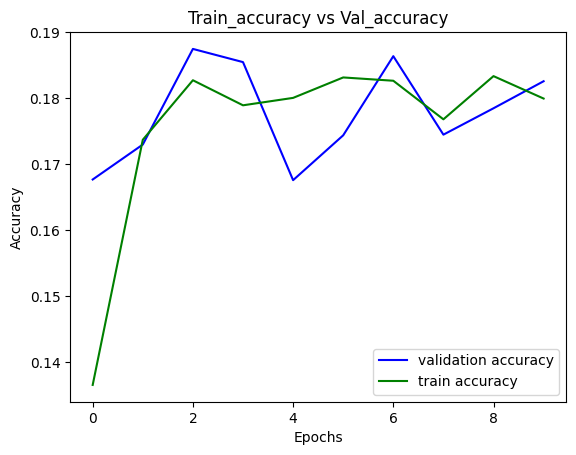

In [9]:
#visualization
plt.plot(result.history['val_accuracy'],label="validation accuracy",color="blue")
plt.plot(result.history['accuracy'],label="train accuracy",color="green")
plt.title("Train_accuracy vs Val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

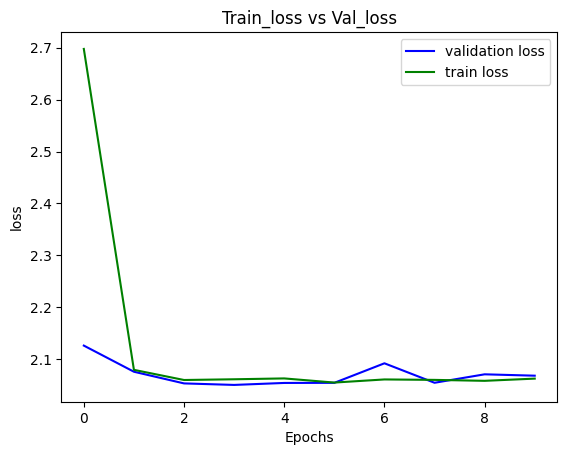

In [10]:
plt.plot(result.history['val_loss'],label="validation loss",color="blue")
plt.plot(result.history['loss'],label="train loss",color="green")
plt.title("Train_loss vs Val_loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

Experiment with depth(number of hidden layers)

In [11]:
#import libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.datasets import cifar10
from keras.optimizers import Adam
from keras.utils import to_categorical
import matplotlib.pyplot as plt

#Load the Data
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print(x_train.dtype)
print(x_train.shape)
print(y_test.shape)
print(x_train[0])

#plt.imshow(x_train[0])
#plt.show()
print("***************************")
#print(f"label is :{y_train[0]}")

#normalize
x_train = x_train.astype('float32')/255.0
x_test  = x_test.astype('float32')/255.0

#to_categorical
print(f"before : label is :{y_train[0]}")
y_train = to_categorical(y_train)
print(f"after : label is :{y_train[0]}")
print(f"after : label is :{y_train[100]}")
y_test = to_categorical(y_test)



uint8
(50000, 32, 32, 3)
(10000, 1)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
***************************
before : label is :[6]
after : label is :[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
after : label is :[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [12]:
model = Sequential()
model.add(Flatten(input_shape =(32,32,3)))
model.add(Dense(128,'relu'))  #layer containg 128 neuron 
model.add(Dense(10,'softmax'))       #10 neurons last layer
model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
#Train
result=model.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2) #64 images are sent each time
result_1 = result

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1018 - loss: 2.6942 - val_accuracy: 0.0952 - val_loss: 2.3037
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0983 - loss: 2.3032 - val_accuracy: 0.1025 - val_loss: 2.3035
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0987 - loss: 2.3037 - val_accuracy: 0.0977 - val_loss: 2.3042
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0988 - loss: 2.3036 - val_accuracy: 0.1003 - val_loss: 2.3032
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0988 - loss: 2.3036 - val_accuracy: 0.0977 - val_loss: 2.3033
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0990 - loss: 2.3037 - val_accuracy: 0.1003 - val_loss: 2.3029
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0955 - loss: 2.3037 - val_accuracy: 0.1021 - val_loss: 2.3035
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0994 - loss: 2.3035 - val_accuracy: 0.

In [14]:
loss,accuracy = model.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1000 - loss: 2.3034
test loss:2.3034098148345947
test accuracy:0.10000000149011612


In [15]:
model_3 = Sequential()
model_3.add(Flatten(input_shape =(32,32,3)))
model_3.add(Dense(128,'relu'))  #layer containg 128 neuron 
model_3.add(Dense(128,'relu'))
model_3.add(Dense(128,'relu'))
model_3.add(Dense(10,'softmax'))       #10 neurons last layer
model_3.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
#Train
result=model_3.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2) #64 images are sent each time
result_3 = result

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2383 - loss: 2.0893 - val_accuracy: 0.2481 - val_loss: 1.9571
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2793 - loss: 1.9206 - val_accuracy: 0.2914 - val_loss: 1.8999
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2885 - loss: 1.9100 - val_accuracy: 0.2964 - val_loss: 1.9195
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2795 - loss: 1.9179 - val_accuracy: 0.2575 - val_loss: 1.9701
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2831 - loss: 1.9053 - val_accuracy: 0.2665 - val_loss: 1.9264
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2962 - loss: 1.8858 - val_accuracy: 0.3029 - val_loss: 1.8832
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2727 - loss: 1.9137 - val_accuracy: 0.2444 - val_loss: 1.9509
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2487 - loss: 1.9401 - val_accuracy: 0.

In [16]:
#Evaluate
loss,accuracy = model_3.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2255 - loss: 1.9768
test loss:1.9767718315124512
test accuracy:0.22550000250339508


In [17]:
model_5 = Sequential()
model_5.add(Flatten(input_shape =(32,32,3)))
model_5.add(Dense(128,'relu'))  #layer containg 128 neuron 
model_5.add(Dense(128,'relu'))
model_5.add(Dense(128,'relu'))
model_5.add(Dense(128,'relu'))
model_5.add(Dense(128,'relu'))
model_5.add(Dense(10,'softmax'))       #10 neurons last layer
model_5.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
#Train
result=model_5.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2) #64 images are sent each time
result_5 = result

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.1820 - loss: 2.1328 - val_accuracy: 0.1929 - val_loss: 2.0563
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.2152 - loss: 2.0191 - val_accuracy: 0.2157 - val_loss: 2.0453
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.2228 - loss: 2.0079 - val_accuracy: 0.2023 - val_loss: 2.0507
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.2303 - loss: 2.0020 - val_accuracy: 0.2191 - val_loss: 2.0627
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.2092 - loss: 2.0341 - val_accuracy: 0.1905 - val_loss: 2.0469
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.2277 - loss: 2.0047 - val_accuracy: 0.2524 - val_loss: 1.9802
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.2292 - loss: 1.9944 - val_accuracy: 0.1843 - val_loss: 2.1089
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.2494 - loss: 1.9782 - val_accuracy: 0.

In [18]:
#Evaluate
loss,accuracy = model_5.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2474 - loss: 1.9529
test loss:1.9529166221618652
test accuracy:0.24740000069141388


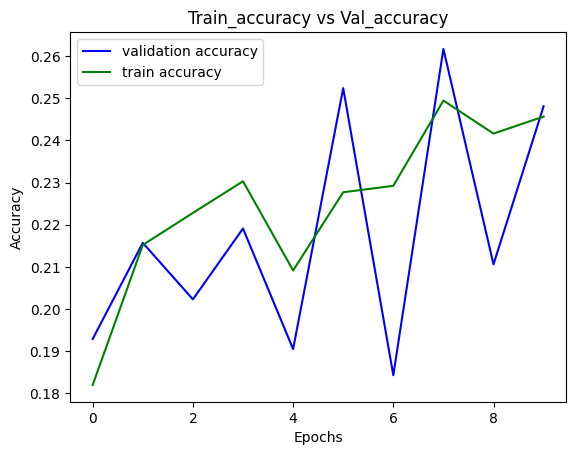

In [19]:
#visualization
plt.plot(result.history['val_accuracy'],label="validation accuracy",color="blue")
plt.plot(result.history['accuracy'],label="train accuracy",color="green")
plt.title("Train_accuracy vs Val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

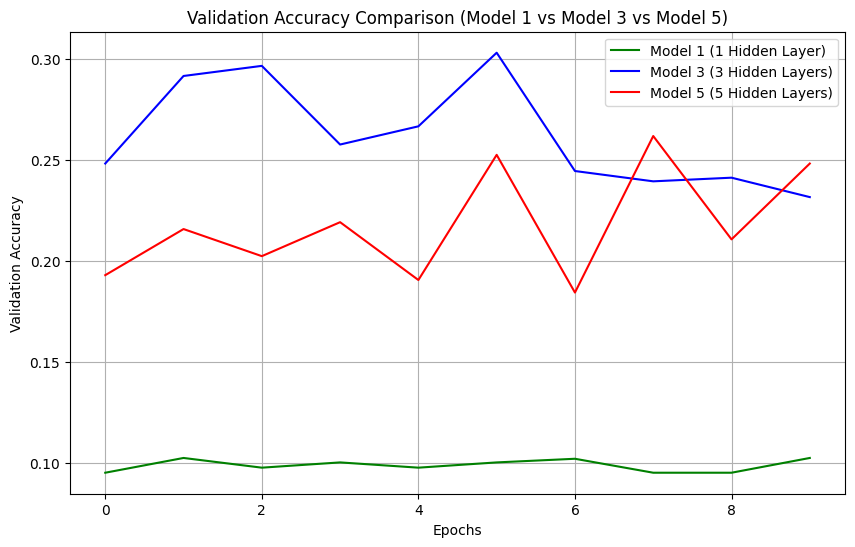

In [20]:
# Visualization for all three models
plt.figure(figsize=(10,6))
plt.plot(result_1.history['val_accuracy'], label='Model 1 (1 Hidden Layer)', color='green')
plt.plot(result_3.history['val_accuracy'], label='Model 3 (3 Hidden Layers)', color='blue')
plt.plot(result_5.history['val_accuracy'], label='Model 5 (5 Hidden Layers)', color='red')
plt.title('Validation Accuracy Comparison (Model 1 vs Model 3 vs Model 5)')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
#import libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.datasets import cifar10
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import to_categorical
import matplotlib.pyplot as plt

#Load the Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.dtype)
print(x_train.shape)
print(y_test.shape)
print(x_train[0])

print("***************************")

#normalize
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

#to_categorical
print(f"before : label is :{y_train[0]}")
y_train = to_categorical(y_train)
print(f"after : label is :{y_train[0]}")
print(f"after : label is :{y_train[100]}")
y_test = to_categorical(y_test)


# -----------------------------
# Model 1 - Using SGD
# -----------------------------
model_SGD = Sequential()
model_SGD.add(Flatten(input_shape=(32,32,3)))
model_SGD.add(Dense(128, activation='relu'))
model_SGD.add(Dense(128, activation='relu'))
model_SGD.add(Dense(128, activation='relu'))
model_SGD.add(Dense(10, activation='softmax'))
model_SGD.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                  loss='categorical_crossentropy', metrics=['accuracy'])

print("\nTraining with SGD optimizer...")
result_SGD = model_SGD.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)
test_loss, test_accuracy = model_SGD.evaluate(x_test, y_test)
print(f"SGD Test Loss: {test_loss}")
print(f"SGD Test Accuracy: {test_accuracy}")


# -----------------------------
# Model 2 - Using Adam
# -----------------------------
model_adam = Sequential()
model_adam.add(Flatten(input_shape=(32,32,3)))
model_adam.add(Dense(128, activation='relu'))
model_adam.add(Dense(128, activation='relu'))
model_adam.add(Dense(128, activation='relu'))
model_adam.add(Dense(10, activation='softmax'))
model_adam.compile(optimizer=Adam(learning_rate=0.01),
                   loss='categorical_crossentropy', metrics=['accuracy'])

print("\nTraining with Adam optimizer...")
result_adam = model_adam.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)
test_loss, test_accuracy = model_adam.evaluate(x_test, y_test)
print(f"Adam Test Loss: {test_loss}")
print(f"Adam Test Accuracy: {test_accuracy}")


# -----------------------------
# Model 3 - Using RMSprop
# -----------------------------
model_RMSprop = Sequential()
model_RMSprop.add(Flatten(input_shape=(32,32,3)))
model_RMSprop.add(Dense(128, activation='relu'))
model_RMSprop.add(Dense(128, activation='relu'))
model_RMSprop.add(Dense(128, activation='relu'))
model_RMSprop.add(Dense(10, activation='softmax'))
model_RMSprop.compile(optimizer=RMSprop(learning_rate=0.01),
                      loss='categorical_crossentropy', metrics=['accuracy'])

print("\nTraining with RMSprop optimizer...")
result_RMSprop = model_RMSprop.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)
test_loss, test_accuracy = model_RMSprop.evaluate(x_test, y_test)
print(f"RMSprop Test Loss: {test_loss}")
print(f"RMSprop Test Accuracy: {test_accuracy}")




uint8
(50000, 32, 32, 3)
(10000, 1)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
***************************
before : label is :[6]
after : label is :[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
after : label is :[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]

Training with SGD optimizer...
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3076 - loss: 1.8961 - val_accuracy: 0.3619 - val_loss: 1.7631
Epoch 2/10
625/625 ━━━━

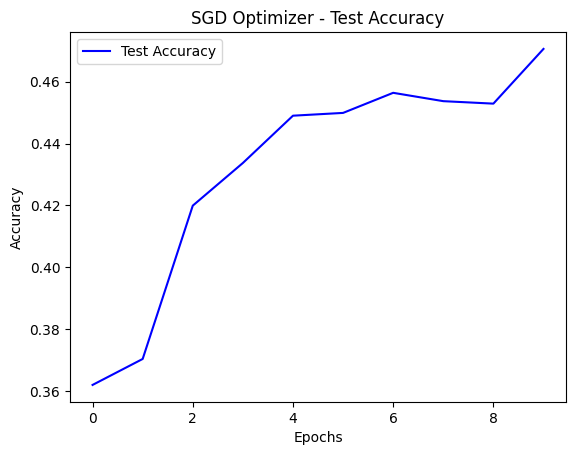

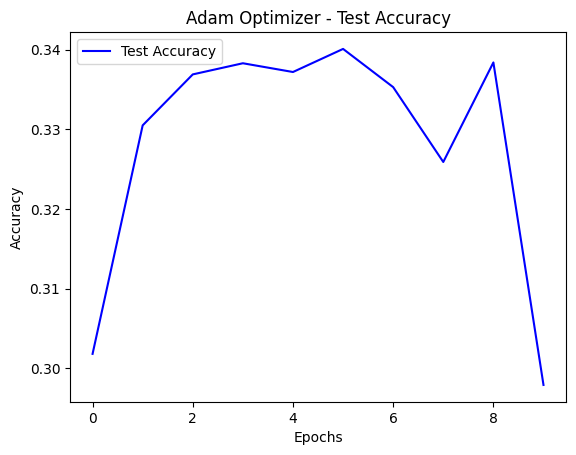

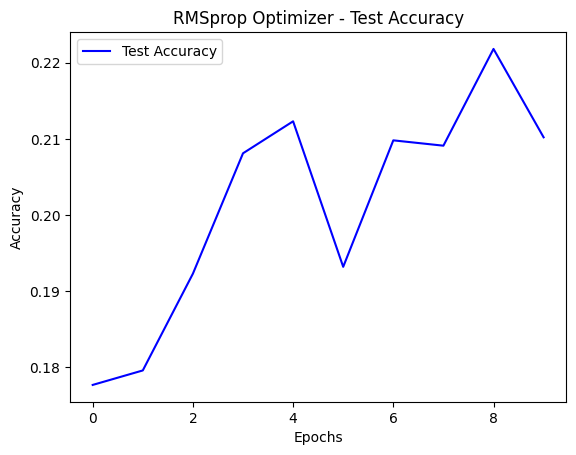

In [22]:
# SGD test accuracy graph
plt.plot(result_SGD.history['val_accuracy'], label='Test Accuracy', color='blue')
plt.title('SGD Optimizer - Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Adam test accuracy graph
plt.plot(result_adam.history['val_accuracy'], label='Test Accuracy', color='blue')
plt.title('Adam Optimizer - Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# RMSprop test accuracy graph
plt.plot(result_RMSprop.history['val_accuracy'], label='Test Accuracy', color='blue')
plt.title('RMSprop Optimizer - Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
#import libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.datasets import cifar10
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import matplotlib.pyplot as plt

#Load the Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)

#normalize
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

#convert labels to categorical
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

#Model
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))

model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))

#Compile
opt = Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#Early Stopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

#Train
result_high = model.fit(x_train, y_train, epochs=80, batch_size=128, validation_split=0.2, callbacks=[early_stop])

#Evaluate
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

#Plot accuracy graph
plt.plot(result_high.history['accuracy'], label='Train Accuracy', color='green')
plt.plot(result_high.history['val_accuracy'], label='Validation Accuracy', color='blue')
plt.title('CIFAR-10 High Accuracy MLP - Train vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


(50000, 32, 32, 3)
(50000, 1)
Epoch 1/80
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - accuracy: 0.2553 - loss: 2.2705 - val_accuracy: 0.3528 - val_loss: 1.8144
Epoch 2/80
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.3280 - loss: 1.9023 - val_accuracy: 0.3557 - val_loss: 1.8095
Epoch 3/80
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.3654 - loss: 1.7763 - val_accuracy: 0.3779 - val_loss: 1.7185
Epoch 4/80
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.3796 - loss: 1.7236 - val_accuracy: 0.3625 - val_loss: 1.7978
Epoch 5/80
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.3944 - loss: 1.6852 - val_accuracy: 0.3996 - val_loss: 1.6805
Epoch 6/80
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.3985 - loss: 1.6651 - val_accuracy: 0.4049 - val_loss: 1.6502
Epoch 7/80
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.4053 - loss: 1.6583 - val_accuracy: 0.4337 - val_loss: 1.5959
Epoch 8/80
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accu

c:\Users\trisa\OneDrive\Desktop\DAY2\venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\trisa\OneDrive\Desktop\DAY2\venv\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 104ms/step - accuracy: 0.2711 - loss: 2.3982 - val_accuracy: 0.3511 - val_loss: 2.0846
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 100ms/step - accuracy: 0.3535 - loss: 2.0898 - val_accuracy: 0.3647 - val_loss: 2.0581
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 107ms/step - accuracy: 0.3915 - loss: 1.9740 - val_accuracy: 0.4222 - val_loss: 1.8945
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step - accuracy: 0.4136 - loss: 1.9058 - val_accuracy: 0.4095 - val_loss: 1.9075
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 79ms/step - accuracy: 0.4357 - loss: 1.8494 - val_accuracy: 0.3518 - val_loss: 2.1938
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.4518 - loss: 1.7991 - val_accuracy: 0.4365 - val_loss: 1.8245
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 78ms/step - accuracy: 0.4618 - loss: 1.7621 - val_accuracy: 0.4260 - val_loss: 1.8669
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 74ms/step - accuracy: 0.4757 - los

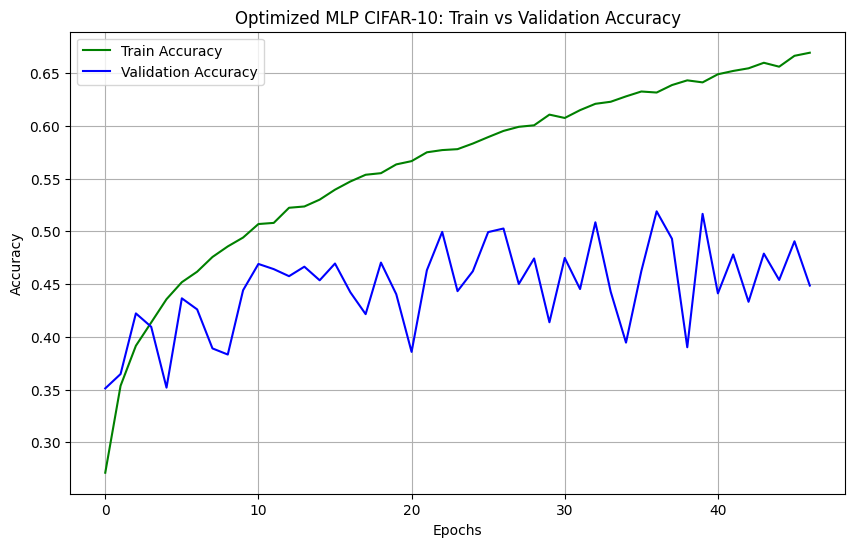

In [ ]:

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, LeakyReLU
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Model
model = Sequential([
    Flatten(input_shape=(32,32,3)),

    Dense(1024, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.4),

    Dense(512, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.4),

    Dense(256, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),

    Dense(128, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),

    Dense(10, activation='softmax')
])

# Compile
opt = Adam(learning_rate=0.0003)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Train
history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=256,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\n Final Test Accuracy: {test_accuracy:.4f}")

# Plot
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='blue')
plt.title('Optimized MLP CIFAR-10: Train vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
